In [144]:
'''
##
## This file is an ipython notebook file used to merge various chunks of data into one big csv file for later use
##
## @file: data_loader.ipynb
## @Author: Jyotirmay
## @Date: 5th, January, 2018
## @copyright: Group 19, DL4CV Project
##

'''

# Importing libraries as required
import numpy as np
import pandas as pd
import os, sys, time
import datetime as dt
import matplotlib.pyplot as plt
import random

# NOTE: You need to open jupyter notebook by running below command to handle huge transactions.
# jupyter notebook --NotebookApp.iopub_data_rate_limit=1000000000000

# load() is a function to load datas and break it to train, test and validate numpy set.
# filename(string): contains a filename to load data from.
# @return pandas datasets for entire data. 
def load(filename):
    tic = dt.datetime.now()
    # Dataset Location.
    file_addr = f"data/{filename}"
    
    # read them in
    excel = pd.ExcelFile(file_addr)

    toc = dt.datetime.now()
    print('Total Execution Time: %s' %(toc-tic))
    
    # turn them into dataframes with first row as header and 3rd column as index(i.e. usage column)
    return excel.parse(excel.sheet_names[0], header=0, index_col=2, sep = " ")

# A function to convert space separated integer values in string format back to integer array
# data(numpy array or list): containing data in ['1 2 3', '2 3 4', ...] format
# return(numpy array): contain converted dataset with [[1,2,3], [2,3,4]] format
def convert_str_to_int(data):
    data = [list(map(int, data[i].split())) for i in range(len(data))]
    return np.array(data)


# split_data() is a function to divide dataset into train, test validate and a small dev set.
# data(pandas dataframe): contains pandas dataset.
# train(integer): contains percentage value to divide for train dataset.
# validate(integer): contains percentage value to divide for validate dataset.
# test(integer): contains percentage value to divide for test dataset.
# @return numpy train, validate, test and dev dataset.
def split_data(data, train, validate, test):
    # Split the data into train, val, and test sets. In addition we will
    # create a small development set as a subset of the data set;
    # we can use this for development so our code runs faster.
    data_count = len(data)
    num_training = int(data_count*train)+1
    num_validation = int(data_count*validate)
    num_test = int(data_count*test)
    num_dev = 500
    
    assert (num_training + num_validation + num_test) == data_count, 'You have not provided a valid data split.'
    
    X = np.array(data["pixels"])
    y = np.array(data["emotion"])
    
    # Converting space separated integer values in string format back to integer array
    X = convert_str_to_int(X)
    
    # Our training set will be the first num_train points from the original
    # training set.
    mask = range(num_training)
    X_train = X[mask]
    y_train = y[mask]

    # Our validation set will be num_validation points from the original
    # training set.
    mask = range(num_training, num_training + num_validation)
    X_val = X[mask]
    y_val = y[mask]

    # We use a small subset of the training set as our test set.
    mask = range(num_training + num_validation, num_training + num_validation + num_test)
    X_test = X[mask]
    y_test = y[mask]

    # We will also make a development set, which is a small subset of
    # the training set. This way the development cycle is faster.
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    return X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev
    
    
# Load data.
data = load(filename = "data1515161011.xlsx")

X, y, X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = split_data(data, train = .60, validate = .20, test = .20)

Total Execution Time: 0:00:02.964240


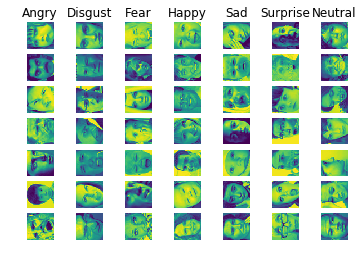

In [145]:

X_old = X
X = X.reshape(-1, 48, 48).transpose(0,2,1).astype("float")

# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
num_classes = len(classes)
samples_per_class = 7
for y_hat, cls in enumerate(classes):
    idxs = np.flatnonzero(y == y_hat)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y_hat + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [146]:
#Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (21533, 2304)
Validation data shape:  (7177, 2304)
Test data shape:  (7177, 2304)
dev data shape:  (500, 2304)
